<a href="https://colab.research.google.com/github/HadiZahwa/welcomehadi/blob/main/FinalProjectHadiZahwa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Overview
Scenario:
Students will analyze a simple e-commerce sales dataset. They’ll perform tasks such as:
1. Importing and cleaning data using Pandas.
2. Using NumPy to perform array-based operations (e.g., sums, averages).
3. Applying loops and conditions (if-statements) to categorize or filter data.
4. Creating functions for repeated tasks and organizing them into modules.
5. Visualizing key insights with Matplotlib (bar charts, scatter plots, etc.).

In [ ]:
# 1. Importing and cleaning data using Pandas:
import pandas as pd
df = pd.read_csv('/content/synthetic_online_retail_data.csv')

# Basic data cleaning
def clean_data(df):

    # Check for missing values in each column
    print(df.isnull().sum())

    # Fill missing values in the 'review_score' column with the mean
    df['review_score'].fillna(df['review_score'].mean(), inplace=True)

    # Remove rows with missing values in the 'gender' column
    df.dropna(subset=['gender'], inplace=True)

    # Remove potential duplicates
    df.drop_duplicates(inplace=True)

    # Calculate total price per item
    df['total_price'] = df['quantity'] * df['price']

    # Convert date column
    df['order_date'] = pd.to_datetime(df['order_date'])

    return df

df = clean_data(df)
print()

# Display the first few rows of the cleaned data
print(df.head())

customer_id         0
order_date          0
product_id          0
category_id         0
category_name       0
product_name        0
quantity            0
price               0
payment_method      0
city                0
review_score      201
gender            103
age                 0
dtype: int64

   customer_id order_date  product_id  category_id       category_name  \
0        13542 2024-12-17         784           10         Electronics   
1        23188 2024-06-01         682           50   Sports & Outdoors   
2        55098 2025-02-04         684           50   Sports & Outdoors   
3        65208 2024-10-28         204           40  Books & Stationery   
4        63872 2024-05-10         202           20             Fashion   

  product_name  quantity   price payment_method            city  review_score  \
0   Smartphone         2  373.36    Credit Card  New Oliviaberg      1.000000   
1  Soccer Ball         5  299.34    Credit Card    Port Matthew      3.992491   
2         Te

<ipython-input-13-2cb6f76993b6>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_score'].fillna(df['review_score'].mean(), inplace=True)


In [ ]:
# 2. Using NumPy to perform array-based operations (e.g., sums, averages):
import numpy as np

# Calculate basic statistics using NumPy
def calculate_statistics(input_field,calculate_statistics,operation):
    if operation =='sum':
         print(f"{calculate_statistics}: {np.sum(df[input_field])}")
    elif operation =='mean':
         print(f"{calculate_statistics}: {np.mean(df[input_field])}")
    elif operation =='median':
         print(f"{calculate_statistics}: {np.median(df[input_field])}")
    elif operation =='std':
         print(f"{calculate_statistics}: {np.std(df[input_field])}")
    else:
         print("Invalid operation")

# Calculate the total sales
calculate_statistics('total_price','Total_sales','sum')

# Calculate the average sale
calculate_statistics('total_price','Average_sale','mean')

# Calculate the median quantity
calculate_statistics('quantity','Median_quantity','median')

# Calculate the standard deviation of prices
calculate_statistics('price','Standard_deviation','std')

# Create age groups using NumPy
age_bins = np.array([0, 18, 25, 35, 50, 65, 100])
age_labels = ['<18', '18-24', '25-34', '35-49', '50-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
print()
print(df.head())

Total_sales: 665647.8400000001
Average_sale: 742.0823188405798
Median_quantity: 3.0
Standard_deviation: 138.7104363636964

   customer_id order_date  product_id  category_id       category_name  \
0        13542 2024-12-17         784           10         Electronics   
1        23188 2024-06-01         682           50   Sports & Outdoors   
2        55098 2025-02-04         684           50   Sports & Outdoors   
3        65208 2024-10-28         204           40  Books & Stationery   
4        63872 2024-05-10         202           20             Fashion   

  product_name  quantity   price payment_method            city  review_score  \
0   Smartphone         2  373.36    Credit Card  New Oliviaberg      1.000000   
1  Soccer Ball         5  299.34    Credit Card    Port Matthew      3.992491   
2         Tent         5   23.00    Credit Card      West Sarah      5.000000   
3   Story Book         2  230.11  Bank Transfer  Hernandezburgh      5.000000   
4        Skirt         4  1

In [ ]:
# 3. Applying loops and conditions (if-statements) to categorize or filter data:

# Categorize customers based on their total spending
def categorize_customer(spending):
    if spending < 500:
        return 'Low'
    elif spending < 1000:
        return 'Medium'
    else:
        return 'High'

customer_spending = df.groupby('customer_id')['total_price'].sum()
customer_categories = customer_spending.apply(categorize_customer)
print(customer_categories.head())
print()

# Filter orders with a specified category
electronics_orders = df[df['category_name'] == 'Electronics']
print(electronics_orders.head())
print()

# Filter orders with a review score greater than 4
positive_reviews = df[df['review_score'] >= 4]
print(positive_reviews[['category_id', 'review_score']].head())

customer_id
10211       Low
10254       Low
10299    Medium
10403      High
10486    Medium
Name: total_price, dtype: object

    customer_id order_date  product_id  category_id category_name  \
0         13542 2024-12-17         784           10   Electronics   
5         29989 2024-12-03         829           10   Electronics   
6         79809 2024-06-07         706           10   Electronics   
10        27389 2025-01-31         549           10   Electronics   
13        61360 2024-12-03         544           10   Electronics   

   product_name  quantity   price    payment_method               city  \
0    Smartphone         2  373.36       Credit Card     New Oliviaberg   
5    Smartphone         4  196.16     Bank Transfer     East Tonyaberg   
6        Tablet         5  272.75     Bank Transfer  North Jessicabury   
10   Smartwatch         2  321.14  Cash on Delivery     Elizabethmouth   
13       Laptop         3  457.44  Cash on Delivery         Myershaven   

    review_sco

In [ ]:
# Using loc for label-based selection
high_value_customers = df.loc[df['total_price'] > 2000, ['customer_id', 'total_price', 'city']]
print("High value customers:\n", high_value_customers.head().sort_values(by='total_price', ascending=False))
print()

# Using iloc for position-based selection
first_5_orders = df.iloc[:5, :]  # First 5 rows, all columns
print("First 5 orders:\n", first_5_orders)
print()

# Conditional selection
electronics = df.loc[df['category_name'] == 'Electronics', :]
print("Electronics:\n", electronics.head())

High value customers:
      customer_id  total_price               city
136        83687      2379.45     Melanieborough
97         77823      2376.55        South Roger
237        38565      2277.15         Nicoletown
173        85614      2263.35         Harrisberg
77         53811      2131.85  Port Cristianfort

First 5 orders:
    customer_id order_date  product_id  category_id       category_name  \
0        13542 2024-12-17         784           10         Electronics   
1        23188 2024-06-01         682           50   Sports & Outdoors   
2        55098 2025-02-04         684           50   Sports & Outdoors   
3        65208 2024-10-28         204           40  Books & Stationery   
4        63872 2024-05-10         202           20             Fashion   

  product_name  quantity   price payment_method            city  review_score  \
0   Smartphone         2  373.36    Credit Card  New Oliviaberg      1.000000   
1  Soccer Ball         5  299.34    Credit Card    Port Ma

In [ ]:
# 4. Creating functions for repeated tasks and organizing them into modules:

# Function to calculate statistics by category
def calculate_category_stats(df, category_col='category_name'):
    stats = df.groupby(category_col).agg({
        'total_price': ['sum', 'mean', 'count'],
        'review_score': 'mean'
    })
    stats.columns = ['total_sales', 'avg_sale', 'transaction_count', 'avg_review']
    return stats

# Function to segment customers by purchase behavior
def customer_segmentation(df):
    customer_stats = df.groupby('customer_id').agg({
        'age': 'first',
        'gender': 'first',
        'city': 'first',
        'total_price': ['sum', 'count', 'mean'],
        'review_score': 'mean',
    })
    customer_stats.columns = ['age', 'gender', 'city', 'total_spent', 'purchase_count', 'avg_purchase',
                            'avg_review']
    return customer_stats

# Calculate statistics by category
print(f"Statistics by category: { calculate_category_stats(df).head()}")
print()

# Segment customers by purchase behavior
print(f"Segment customers by purchase behavior: { customer_segmentation(df).head()}")
print()

Statistics by category:                     total_sales    avg_sale  transaction_count  avg_review
category_name                                                             
Books & Stationery    127225.38  744.008070                171    3.945612
Electronics           151426.86  801.200317                189    4.009271
Fashion               125495.92  693.347624                181    3.970924
Home & Living         123821.16  724.100351                171    3.928507
Sports & Outdoors     137678.52  744.208216                185    4.036295

Segment customers by purchase behavior:              age gender                city  total_spent  purchase_count  \
customer_id                                                                
10211         25      F        Lake Michael        65.02               1   
10254         73      M      Port Christine        70.93               1   
10299         33      F         Teresaville       815.76               1   
10403         65      M  Lake 

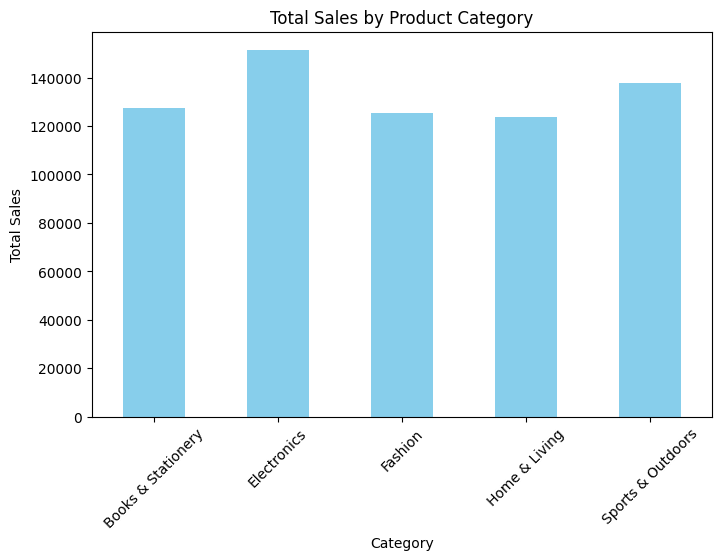

<ipython-input-26-2dabcde1e69c>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_per_age_group = df.groupby('age_group')['total_price'].sum()


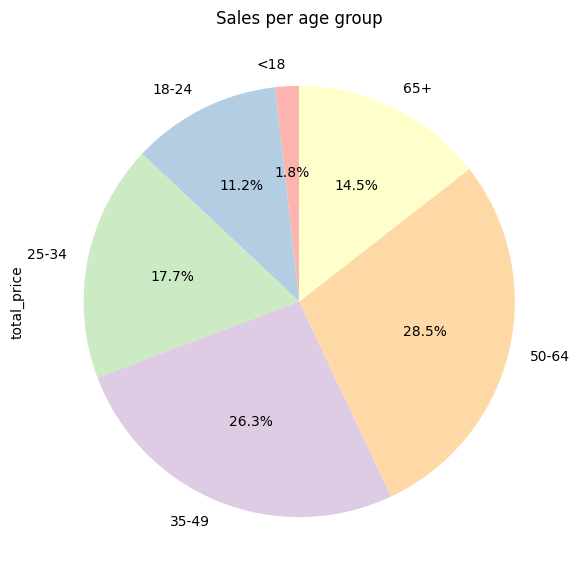

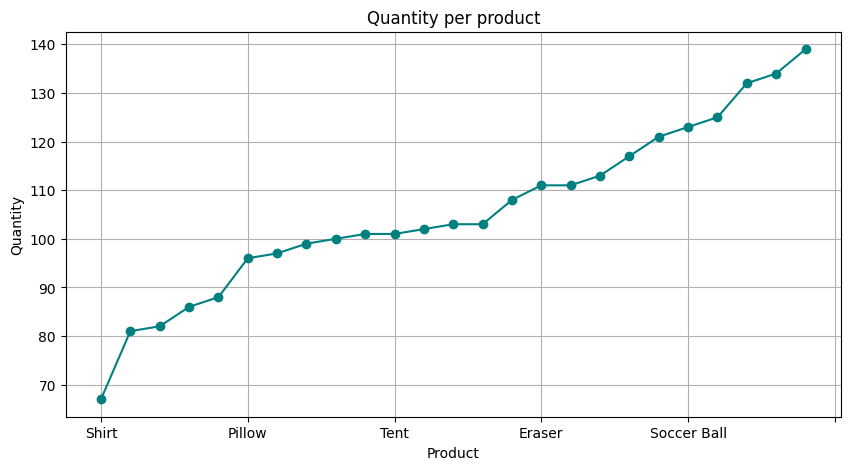

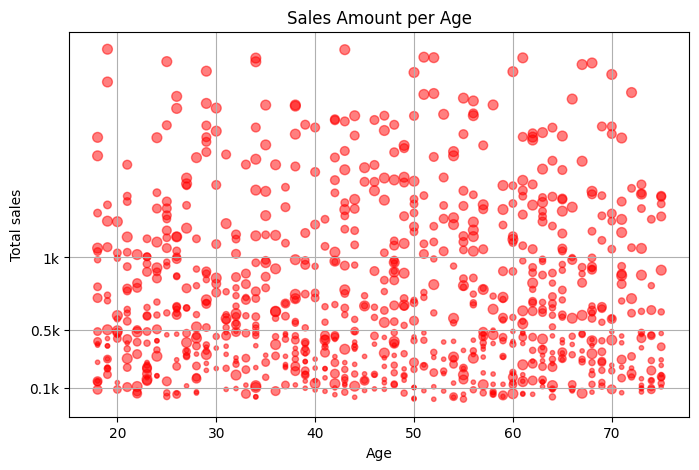

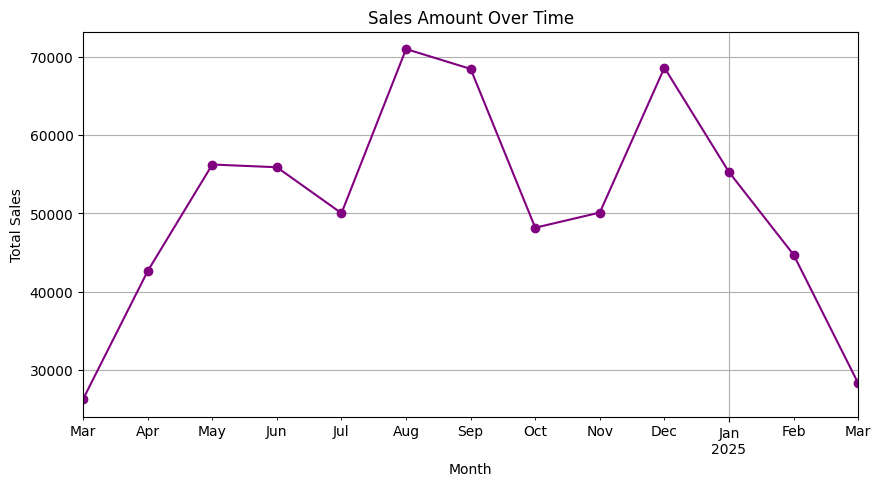

In [ ]:
# 5. Visualizing key insights with Matplotlib (bar charts, scatter plots, etc.):
import matplotlib.pyplot as plt

def plot(x_label, y_label, title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print()

# Sales by Category (Bar Chart)
def plot_sales_by_category(df):
    sales_per_category = df.groupby('category_name')['total_price'].sum()
    plt.figure(figsize=(8, 5))
    sales_per_category.plot(kind='bar', color='skyblue')
    plt.xticks(rotation=45)
    plot('Category', 'Total Sales', 'Total Sales by Product Category')

# Sales per age group (Pie Chart)
def plot_sales_per_age_group(df):
    sales_per_age_group = df.groupby('age_group')['total_price'].sum()
    plt.figure(figsize=(7, 7))
    sales_per_age_group.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
    plt.title('Sales per age group')
    plt.show()

# Quantity per product
def plot_quantity_per_product(df):
    quantity_per_product = df.groupby('product_name')['quantity'].sum().sort_values()
    plt.figure(figsize=(10, 5))
    quantity_per_product.plot(kind='line', marker='o', linestyle='-', color='teal')
    plt.grid(True)
    plot('Product', 'Quantity', 'Quantity per product')

# Age vs. Spending and quantity (Scatter Plot)
def plot_Age_vs_Spending_vs_quantity(df):
    plt.figure(figsize=(8, 5))
    plt.scatter(df['age'], df['total_price'], df['quantity']*10, alpha=0.5, color='red')
    plt.grid(True)
    plt.yticks([100, 500, 1000], ['0.1k', '0.5k', '1k'])
    plot('Age', 'Total sales', 'Sales Amount per Age')

# Sales amounts have changed over time
def plot_sales_over_time(df):
    sales_over_time = df.groupby(df['order_date'].dt.to_period('M'))['total_price'].sum()
    plt.figure(figsize=(10, 5))
    sales_over_time.plot(kind='line', marker='o', linestyle='-', color='purple')
    plt.grid(True)
    plot('Month', 'Total Sales', 'Sales Amount Over Time')

# Total sales amount by category
plot_sales_by_category(df)

# Sales per age group
plot_sales_per_age_group(df)

# Explore quantity by product
plot_quantity_per_product(df)

# Sales amount and quantity per age
plot_Age_vs_Spending_vs_quantity(df)

# Explore how sales amounts have changed over time
plot_sales_over_time(df)